In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Data

## Import

In [2]:
dataset = pd.read_csv('Wine.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [3]:
dataset.shape

(178, 14)

In [4]:
X = dataset.iloc[:,:-1].values
X.shape

(178, 13)

## Duplicates

In [5]:
dataset.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

# KMeans

In [6]:
from sklearn.cluster import KMeans

In [7]:
# Finding out the right number of clusters

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

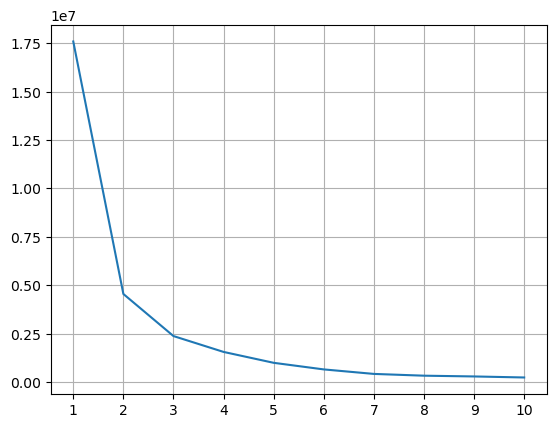

In [8]:
plt.plot([i for i in range(1,11)],wcss)
plt.xticks([i for i in range(1,11)])
plt.grid()

In [9]:
kmeans = KMeans(n_clusters=2,random_state=0,init='k-means++')
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [10]:
X.shape

(178, 13)

In [11]:
y = kmeans.predict(X)
y.shape

(178,)

# PCA

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

## Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decomposition

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

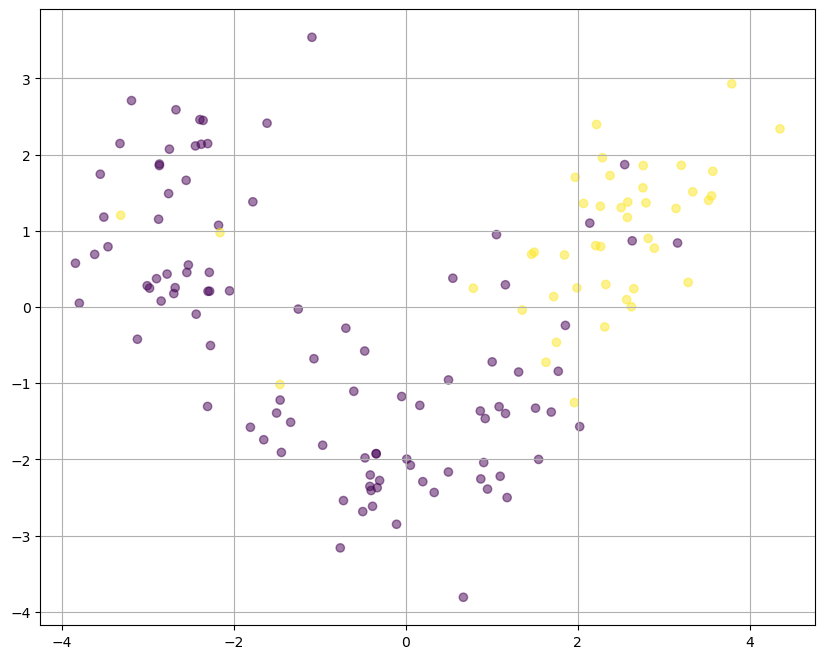

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='viridis',alpha=.5)
plt.grid()

# LogReg

In [20]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[21  2]
 [ 1 12]]


0.9166666666666666